# Test simulation matching

## Imports

In [1]:
import sys
import os
import pprint
import cPickle as pickle
import numpy as np
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.lensing import LensModel
from gleam.utils.plotting import kappa_map_plot
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()
from mcmc_matching import load_lo, load_lm
from mcmc_eval import read_mcmctxt
from match_eval import read_matchlog


## Load lensing data and models

In [2]:
ids = ['SDSSJ0029-0055', 'SDSSJ0737+3216', 'SDSSJ0753+3416', 'SDSSJ0956+5100',
       'SDSSJ1051+4439', 'SDSSJ1430+6104', 'SDSSJ1627-0053']
idx = 6
lens = ids[idx]
pixrad = 11
print(lens)
mdir = 'match_plots/{lens}/'.format(lens=lens)
sdir = os.path.join(mdir, 'sorted')

mcmcmdl_range, chi2_mcmc, mcmcangles = read_mcmctxt('mcmc/mcmceval_{}.txt'.format(lens))
chi2_mcmc = -chi2_mcmc
if idx in [2, 3, 5]:
    chi2_mcmc = 0.25*chi2_mcmc
if idx in [6]:
    chi2_mcmc = 0.5*chi2_mcmc
# chi2_mcmc = np.exp(-2*chi2_mcmc)

matchlog = '{}{}_matching.log'.format(mdir, lens)
matchmdl_range, chi2_match, matchangles = read_matchlog(matchlog)
chi2_match = 2*chi2_match
if idx in [4, 5]:
    chi2_match = 2*chi2_match
# chi2_match = np.exp(2*chi2_match)
sortidcs = np.argsort(chi2_match)
matchmdl_range = matchmdl_range[sortidcs]
chi2_match = chi2_match[sortidcs]
matchangles = matchangles[sortidcs]

print(mcmcmdl_range[:11])
print(chi2_mcmc[:11])

print(matchmdl_range[:11])
print(chi2_match[:11])


SDSSJ1627-0053
[ 36 140   7  60 135 238 212 193 191  69  95]
[1.892   1.93195 1.93375 2.0337  2.06065 2.06595 2.0692  2.0866  2.10135
 2.1241  2.15645]
[108 233 245 119 120  20  99 227 104 142 121]
[1.7108 1.8956 1.8992 1.9866 1.9976 2.0162 2.018  2.0212 2.077  2.1184
 2.1322]


In [3]:
files = !ls models/kappa/*/*.fits
all_models = LensModel(files)
print(all_models.__v__)


filename            	lensmodels.fits
filepath            	lensmodels.fits
N                   	1577
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]
zl                  	None
zs                  	None


In [4]:
lm = load_lm(lens, update_pixrad=pixrad, verbose=False)
lm.rescale(zl_new=0.23, zs_new=0.8)  # reverse rescaling for comparison
print(lm.__v__)


filename            	SDSSJ1627-0053_kappa_re1.27_zl0.21zs0.52.pkl
filepath            	models/SDSSJ1627-0053_kappa_re1.27_zl0.21zs0.52.pkl
N                   	257
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]
zl                  	0.23
zs                  	0.8


In [5]:
def bruteforce_find(models, index, pool, only_best=True, verbose=False):
    target_idcs = []
    if isinstance(index, int):
        index = [index]
    for midx in index:
        differences = np.sum(np.abs(all_models.data[:] - lm[midx][:]), axis=(1, 2))
        kinpool = np.argsort(differences)
        if verbose:
            print(differences[kinpool][0]),
        if only_best:
            kinpool = kinpool[0]
        target_idcs.append(kinpool)
    return np.array(target_idcs)


In [6]:
bestof = 51
mdlidcs = np.concatenate((mcmcmdl_range[:bestof], matchmdl_range[:bestof]))
print(mcmcmdl_range[:bestof])
print(matchmdl_range[:bestof])


[ 36 140   7  60 135 238 212 193 191  69  95  32  63  87  19  76  68 214
  14  77  31 162 107 236 109 192  25  66  84 113 206 150 129 222 136  98
 127 182   6 207 114 237  79 116  35  86 180 105  73  30 110]
[108 233 245 119 120  20  99 227 104 142 121 165 112 151 244 125 181  78
 249 180 126 130 106  88 128 195 229 101 241 187 100 160 168 243 204 157
 196 115 177 164 194 242 123 210 122 147 255 186 103 124 152]


In [7]:
kinpool = bruteforce_find(lm, mdlidcs, all_models, only_best=False, verbose=True)
print(kinpool[:, 0])


1.4702822292989026e-13 1.5916781781477596e-13 1.2924278075705786e-13 1.385293789402109e-13 8.202967927313509e-14 1.1921587577800458e-13 1.3519003624895554e-13 1.6557507318340492e-13 1.5391594249125617e-13 2.0694210234317723e-13 1.424631083674771e-13 1.0545564597887365e-13 1.766674913999955e-13 1.415137538401945e-13 1.1354676557719448e-13 1.6313579447816556e-13 1.5594643631988703e-13 1.3168632850835138e-13 2.4167473577918486e-13 1.4055076547059286e-13 1.3026060265153294e-13 1.7390255901972296e-13 1.2209200664359265e-13 1.4806889438515047e-13 1.4670770566264923e-13 1.5827616994812388e-13 1.44055774253804e-13 1.7258416917798058e-13 1.4984714857835257e-13 1.23064795184394e-13 1.163701330664322e-13 1.2695660495110062e-13 1.5512070794532207e-13 1.48020484758149e-13 7.923686309763454e-14 7.622849387183759e-14 9.882031258963636e-14 1.5596551827812277e-13 1.239013435578272e-13 1.2411016767251148e-13 1.4313355188588783e-13 1.837202265320137e-13 1.6041595135574127e-13 1.8648277366750676e-13 1.523

##############################   0   ##############################


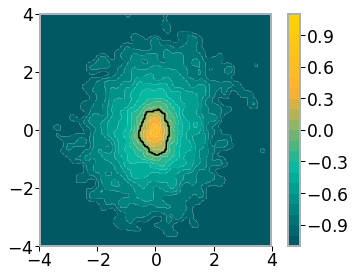

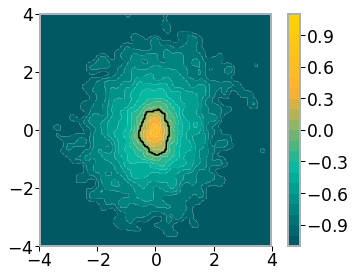

##############################   1   ##############################


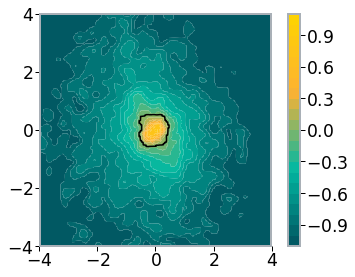

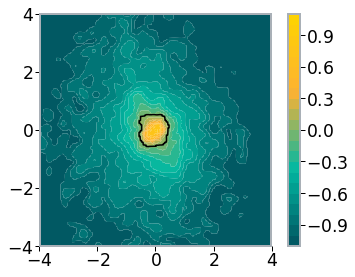

In [10]:
# %%script false
for i, mdl_idx in enumerate(mdlidcs[:2]):
    print("#"*30 + "   " + str(i) + "   " + "#"*30)
    kappa_map_plot(lm, contours=True, mdl_index=mdl_idx, levels=12, log=True)
    plt.colorbar()
    # plt.xlim(-2.5, 2.5)
    # plt.ylim(-2.5, 2.5)
    plt.show()

    kappa_map_plot(all_models, contours=True, mdl_index=kinpool[i][0], levels=12, log=True)
    plt.colorbar()
    # plt.xlim(-2.5, 2.5)
    # plt.ylim(-2.5, 2.5)
    plt.show()


In [ ]:
# %%script false
with open('models/matches/{}_best{}_{}.txt'.format(lens, bestof, bestof), 'wb') as f:
    f.write('# {}\n'.format('\t'.join(['{:40s}'.format('filename'), 'chi2', 'rotation'])))
    for i, ik in enumerate(kinpool):
        print(files[ik[0]])
        if i == 0:
            f.write('# Best matches (according to MCMC):\n')
        elif i == bestof:
            f.write('#\n# Best matches (according to chi2):\n')
        if i // bestof == 0:
            leastsqr = chi2_mcmc[i]
            angle = mcmcangles[i][0]
        elif i // bestof == 1:
            leastsqr = chi2_match[i-51]
            angle = matchangles[i-51]
        filestr = files[ik[0]].replace('models/kappa/', '')
        filestr = '{:40s}'.format(filestr)
        chi2str = '{:8.4f}'.format(leastsqr)
        anglestr = '{:6.2f}'.format(angle)
        f.write('\t'.join([filestr, chi2str, anglestr]))
        f.write('\n')
os.system('say "All models have been processed"')